## Q1. SQL

Per a treballar amb sql en un csv utilitzarem **import pandasql as ps** per aplicar les sql queries i **pandas** per importar i treballar amb el csv.

In [ ]:
pip install SQLAlchemy==1.4.46

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.21
    Uninstalling SQLAlchemy-2.0.21:
      Successfully uninstalled SQLAlchemy-2.0.21
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.46 which is incompatible.


In [ ]:
pip install pandasql


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=c94a855abcdf825e00a2e4e9d12f45e12c995eb5e3602e93219b375d716037fc
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [172]:
# and restart kernell

In [173]:
import pandas as pd
import pandasql as ps

In [174]:
#read the data as a df
sales_df = pd.read_csv(r"./data/Sales.csv")
sales_df.head(2)

,created_at,price,sku,customer_id,order_number,discount_code,total_discounts
0,2021-06-01 00:01:40+00:00,3.0627,cbhRDfwNxc,7619347081,344511,ePWupAyyQN15,0.540476
1,2021-06-01 00:01:40+00:00,0.0000,wtQmOQTJXB,7619347081,344511,ePWupAyyQN15,0.000000


In [175]:
#read the data as a df
influencers_df = pd.read_csv(r"./data/Influencers.csv")
influencers_df.head(2)

,date,influencer_category,campaign_cost,impressions,actions,click_swipe_up_product,discount_code,influencer_name,product_sku
0,2021-06-01 00:00:00+00:00,"LIFESTYLE (viajes, moda…)",489.15,146254.0,3219.0,642.0,TSTqLOnktH15,TSTqLOnktH,iOMohQQWUh
1,2021-06-02 00:00:00+00:00,"LIFESTYLE (viajes, moda…)",434.80,70669.0,2672.0,899.0,OZMFVXhavH15,OZMFVXhavH,eJMvAQUeLC


In [176]:
influencers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    137 non-null    object 
 1   influencer_category     137 non-null    object 
 2   campaign_cost           137 non-null    float64
 3   impressions             132 non-null    float64
 4   actions                 130 non-null    float64
 5   click_swipe_up_product  127 non-null    float64
 6   discount_code           137 non-null    object 
 7   influencer_name         137 non-null    object 
 8   product_sku             127 non-null    object 
dtypes: float64(4), object(5)
memory usage: 9.8+ KB


In [177]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292480 entries, 0 to 292479
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   created_at       292480 non-null  object 
 1   price            292480 non-null  float64
 2   sku              292480 non-null  object 
 3   customer_id      292480 non-null  int64  
 4   order_number     292480 non-null  int64  
 5   discount_code    146185 non-null  object 
 6   total_discounts  146185 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 15.6+ MB


In [178]:
sales_df.describe()

,price,customer_id,order_number,total_discounts
count,292480.000000,2.924800e+05,292480.00000,146185.000000
mean,21.750443,5.009015e+09,500646.47445,3.836695
std,21.565790,2.884860e+09,288624.72909,3.796048
min,0.000000,3.184600e+04,4.00000,0.000000
25%,3.677700,2.520404e+09,251334.00000,0.649006
50%,18.357750,5.003299e+09,499030.50000,3.188594
75%,30.737700,7.505039e+09,751940.25000,5.424300
max,614.754000,9.999837e+09,999997.00000,108.486000


1. What is our TOP selling influencer? How many sales can you attribute to that
collaboration?


In [179]:
# check that 'discount_code' is  unique for each influencer
influencers_df['discount_code'].nunique() == influencers_df.shape[0]


True

To solve this exercise, we need to work with both tables. The "sales" table provides us with the number of sales, while the "Influencers" table contains the names of the influencers. To relate these two tables, we will use the common field **discount_code**, which is unique for each influencer.

To join the two tables, we need to consider the relationship between them: **many** sales to **one** influencer. We will use an **INNER JOIN** to select all the rows from both tables, provided they match in the common field.

In [180]:
query = """SELECT influencer_name,  COUNT(sales_df.discount_code) AS item_count
FROM sales_df
INNER JOIN influencers_df ON sales_df.discount_code = influencers_df.discount_code
GROUP BY sales_df.discount_code
ORDER BY COUNT(sales_df.discount_code) DESC;"""

In [181]:
result_df = ps.sqldf(query, locals())

In [182]:
result_df.head()

,influencer_name,item_count
0,atBzuYYKIM,1249
1,pnefgFhMTu,1227
2,HQOhLxFBii,1221
3,eEdlsmzOgF,1207
4,ZcAGgKLLsy,1201


The influencer with the most sales is **atBzuYYKIM**, with a total of **1249** items sold.






## 2. What is the influencer with the highest average order value? And with the biggest basket size?

In [183]:
sales_df.shape

(292480, 7)

In [184]:
# num of orders
sales_df['order_number'].nunique()

111759

Each order 'Order_number' (order identification code) has different 'sku' (unique identification of the product sold). To answer the first part of the question, you need to use the 'order_number' fields grouped by the sum of the 'price' of the products sold.

In [185]:
query = """
SELECT influencer_name, AVG(price_order) AS average_order_value
FROM (
  SELECT *, SUM(price) AS price_order
  FROM sales_df
  INNER JOIN influencers_df ON sales_df.discount_code = influencers_df.discount_code
  GROUP BY  order_number)
GROUP BY discount_code
ORDER BY average_order_value DESC
;"""

In [186]:
result_df = ps.sqldf(query, locals())
result_df.shape

(137, 2)

In [187]:
result_df.head()

,influencer_name,average_order_value
0,iEfVBIuJkF,62.308926
1,vZKjDZxToE,60.076111
2,HejCZMxoru,59.726912
3,dsbhQZOnjD,59.403460
4,EJtUbYssgv,59.399858


The influencer with the highest average order value is **iEfVBIuJkF** with an average order value of **62.30**.

## 2. b)  And with the biggest basket size?

In [188]:
# we have 25 unique products
influencers_df['product_sku'].nunique()

25

In [189]:
influencers_df.head(1)

,date,influencer_category,campaign_cost,impressions,actions,click_swipe_up_product,discount_code,influencer_name,product_sku
0,2021-06-01 00:00:00+00:00,"LIFESTYLE (viajes, moda…)",489.15,146254.0,3219.0,642.0,TSTqLOnktH15,TSTqLOnktH,iOMohQQWUh


In [190]:
query = """
SELECT influencer_name, COUNT(DISTINCT product_sku) AS distinct_products
FROM influencers_df
GROUP BY influencer_name
ORDER BY distinct_products DESC
;
"""

In [191]:
result_df = ps.sqldf(query, locals())
result_df.shape

(137, 2)

In [192]:
result_df.head()

,influencer_name,distinct_products
0,yluzaGgjrP,1
1,yjTMInNjnN,1
2,yVVdgHULeJ,1
3,yJazIFZWPE,1
4,xkYwaqBtgg,1


There are **127 influencers** with the biggest basket size and each has **one product** and 10 without a product because the product sku is null.

## 3. What is the top selling product for new customers? And for repetitors?

In [200]:
# productes mes venuts
result_df.groupby('product_sku')['product_sku'].count()

product_sku
AOyYzhbFli     3121
AtmskdSBwK     1984
CCIxIhOiny     1134
IaJQEZoTQF    13555
JBSmbFbPyZ     3167
Omusfdnhic     4243
PhQMGcDkEV     1124
QMnPBMgrBs     3227
RiStfpPCae     1073
TBwUxDwrqi     2194
VIyXWsuoAa     4504
YCKqGOVjNB     1051
ZDBuNEnhBR     9928
aHKAZsXhZc     1067
alZHSuCsol     1024
dSCeVqtnBM     2245
eJMvAQUeLC     2205
hgrDnRXPxF      966
iOMohQQWUh     5412
lRWwQhClpB     1039
ltvLTETmit    28370
npBitaUyaT     2079
qmQGUdxZlh    37196
sGoKpRbCML     2333
tKhKKrZPJq     1097
Name: product_sku, dtype: int64

In [202]:
query = """
SELECT t1.customer_id, t1.first_date, t2.product_sku,
  COUNT(product_sku) OVER (PARTITION BY product_sku) AS sum_products_sold
FROM (
    SELECT customer_id, MIN(date) AS first_date
    FROM (
        SELECT date, product_sku, customer_id
        FROM sales_df
        LEFT JOIN influencers_df ON sales_df.discount_code = influencers_df.discount_code
    ) s
    GROUP BY s.customer_id
) t1
INNER JOIN (
    SELECT date, product_sku, customer_id
    FROM (
        SELECT date, product_sku, customer_id
        FROM sales_df
        LEFT JOIN influencers_df ON sales_df.discount_code = influencers_df.discount_code
    ) s
) t2 ON t1.customer_id = t2.customer_id AND t1.first_date = t2.date
ORDER BY sum_products_sold DESC
;"""

In [203]:
result_df = ps.sqldf(query, locals())
result_df.shape

(146183, 4)

In [204]:
result_df.head()

,customer_id,first_date,product_sku,sum_products_sold
0,326396,2021-06-15 00:00:00+00:00,qmQGUdxZlh,37194
1,326396,2021-06-15 00:00:00+00:00,qmQGUdxZlh,37194
2,429541,2021-06-13 00:00:00+00:00,qmQGUdxZlh,37194
3,429541,2021-06-13 00:00:00+00:00,qmQGUdxZlh,37194
4,1702185,2021-09-07 00:00:00+00:00,qmQGUdxZlh,37194


Top selling product for new customers is **qmQGUdxZlh** with 37194 products sols.

In [351]:
query = """
SELECT t1.customer_id, t1.first_date, t2.product_sku,
  COUNT(product_sku) OVER (PARTITION BY product_sku) AS sum_products_sold
FROM (
    SELECT customer_id, MIN(date) AS first_date
    FROM (
        SELECT date, product_sku, customer_id
        FROM sales_df
        LEFT JOIN influencers_df ON sales_df.discount_code = influencers_df.discount_code
    ) s
    GROUP BY s.customer_id
) t1
INNER JOIN (
    SELECT date, product_sku, customer_id
    FROM (
        SELECT date, product_sku, customer_id
        FROM sales_df
        LEFT JOIN influencers_df ON sales_df.discount_code = influencers_df.discount_code
    ) s
) t2 ON t1.customer_id = t2.customer_id
WHERE
    t2.date <> t1.first_date
ORDER BY sum_products_sold DESC
;"""

In [352]:
result_df = ps.sqldf(query, locals())
result_df.shape

(2, 4)

In [353]:
result_df.head()

,customer_id,first_date,product_sku,sum_products_sold
0,496604585,2021-07-06 00:00:00+00:00,qmQGUdxZlh,2
1,496604585,2021-07-06 00:00:00+00:00,qmQGUdxZlh,2


Only 2 products of **qmQGUdxZlh** has been sold to recurrent clients.

## 4. What collaboration brought the most recurrent clients?

In [213]:
influencers_df.head(1)

,date,influencer_category,campaign_cost,impressions,actions,click_swipe_up_product,discount_code,influencer_name,product_sku
0,2021-06-01 00:00:00+00:00,"LIFESTYLE (viajes, moda…)",489.15,146254.0,3219.0,642.0,TSTqLOnktH15,TSTqLOnktH,iOMohQQWUh


In [214]:
sales_df.head(3)

,created_at,price,sku,customer_id,order_number,discount_code,total_discounts
0,2021-06-01 00:01:40+00:00,3.0627,cbhRDfwNxc,7619347081,344511,ePWupAyyQN15,0.540476
1,2021-06-01 00:01:40+00:00,0.0000,wtQmOQTJXB,7619347081,344511,ePWupAyyQN15,0.000000
2,2021-06-01 00:01:40+00:00,15.9777,lzmqiIYRgP,7619347081,344511,ePWupAyyQN15,2.819594


In [215]:
sales_df.shape

(292480, 7)

In [216]:
query = """
SELECT influencers_df.discount_code,
  COUNT(customer_id) OVER (PARTITION BY min_disc_code) AS sum_clients_by_influ
  -- count number of purchases by the firsty time influencer purchase of each client
FROM (
  SELECT
    *,
      (
          CASE
              WHEN created_at = MIN(created_at) OVER (PARTITION BY customer_id) THEN discount_code
              -- min date customer id new field value = > discount_code
              ELSE NULL
          END
      ) AS min_disc_code
  FROM
      sales_df
) AS subquery
INNER JOIN influencers_df ON subquery.min_disc_code = influencers_df.discount_code
WHERE min_disc_code IS NOT NULL
GROUP BY order_number --number of orders
ORDER BY sum_clients_by_influ DESC
"""

In [217]:
result_df = ps.sqldf(query, locals())
result_df.shape

(57503, 2)

In [218]:
result_df.head(1)

,discount_code,sum_clients_by_influ
0,pnefgFhMTu15,482


The collaboration with the influencer named **atBzuYYKIM**  brought the most recurrent clients  with 482 orders from clients whose first purchase was with him.

## 5. What is the influencer category with the highest ROAS? (Understand ROAS as the monetary return in sales of every euro we spend on collaborations)

In [219]:
# roas from total
sales_df['price'].sum() / influencers_df['campaign_cost'].sum()

50.23614161210476

In [220]:
query = """
SELECT
  i.influencer_category,
  SUM(s.price) AS total_revenue,
  i.total_cost_bycat,
  SUM(s.price) / i.total_cost_bycat AS roas
FROM sales_df s
LEFT JOIN (
    SELECT
      influencer_category,
      discount_code,
      SUM(campaign_cost) OVER (PARTITION BY influencer_category) AS total_cost_bycat
    FROM influencers_df  -- sum of campaign cost grouped by influ type
) i ON s.discount_code = i.discount_code
group by influencer_category
ORDER BY
    roas DESC
;"""

In [221]:
result_df = ps.sqldf(query, locals())
result_df.shape
result_df.head()

,influencer_category,total_revenue,total_cost_bycat,roas
0,MAKEUP,2.387584e+04,271.750,87.859568
1,"ARTISTA (actor, cantante, fotógrafo…)",1.766257e+05,3409.919,51.797627
2,ILUSTRACION,2.118106e+05,7112.241,29.781137
3,LGTBIQ+,2.214009e+04,760.900,29.097235
4,"LIFESTYLE (viajes, moda…)",1.608773e+06,59327.373,27.116875


The influencer category with the highest ROAS is **MAKEUP** with a ROAS of **87.85**.

##6. What is the most sold product for people who bought because of a collaboration and with an average order value lower than 60€?

## What percentage of our sales does this product represent?

In [222]:
query = """
WITH sales_avg_order_val AS (
  SELECT *,
    SUM(price) OVER (PARTITION BY order_number) AS avg_order_value
  FROM sales_df
  WHERE discount_code IS NOT NULL
)
SELECT i.product_sku, COUNT(i.product_sku) AS orders_less_60
FROM sales_avg_order_val
LEFT JOIN influencers_df AS i ON sales_avg_order_val.discount_code = i.discount_code
WHERE avg_order_value < 60
GROUP BY product_sku
ORDER BY orders_less_60 DESC
;"""

In [223]:
result_df = ps.sqldf(query, locals())
result_df.shape

(26, 2)

In [224]:
result_df.head()

,product_sku,orders_less_60
0,qmQGUdxZlh,18022
1,ltvLTETmit,13242
2,IaJQEZoTQF,6401
3,ZDBuNEnhBR,4854
4,iOMohQQWUh,2645


The most sold product for people who bought because of a collaboration and with an average order value lower than 60€ IS  **qmQGUdxZlh** with a total of 18022 orders.

## What percentage of our sales does this product represent?

In [225]:
query = """
WITH sales_avg_order_val AS (
  SELECT *,
    SUM(price) OVER (PARTITION BY order_number) AS avg_order_value
  FROM sales_df
  WHERE discount_code IS NOT NULL
)

SELECT
  i.product_sku,
  COUNT(i.product_sku) AS product_count,
  total_sales.total_count,
  COUNT(i.product_sku) * 100 / total_sales.total_count AS percentage_of_sales
FROM sales_avg_order_val
LEFT JOIN influencers_df AS i ON sales_avg_order_val.discount_code = i.discount_code
CROSS JOIN (
   SELECT COUNT(*) AS total_count
  FROM sales_df
) AS total_sales
WHERE avg_order_value < 60
GROUP BY i.product_sku, total_sales.total_count
ORDER BY percentage_of_sales DESC
LIMIT 1;
"""

In [226]:
result_df = ps.sqldf(query, locals())
result_df.shape

(1, 4)

In [227]:
result_df.head()

,product_sku,product_count,total_count,percentage_of_sales
0,qmQGUdxZlh,18022,292480,6


The percentage of sales of product **qmQGUdxZlh** out of the total products sold is **6%**.

## Python (50 points)

#### In the file price_analytics.csv you have the product sales history within one product category. As we are planning a promotion for our top sellers, please identify the top 2 products (we will refer to them as No.1 and No.2) and answer the following questions with detailed analytics:

In [330]:
#read the csv as a df
pricean_df = pd.read_csv(r"./data/Price_analytics.csv", index_col=0)
pricean_df.head(2)

,Date,sku,unit_price,units
0,"Feb 15, 2021",M735H7159,55.71,262.0
1,"Feb 15, 2021",3637H1617,140.36,5.0


In [331]:
pricean_df.describe()

,unit_price,units
count,1671.000000,1671.000000
mean,70.714548,121.219031
std,22.347698,981.090547
min,11.310000,5.000000
25%,56.515000,5.000000
50%,66.520000,8.000000
75%,76.500000,23.000000
max,140.360000,37293.000000


In [332]:
pricean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1671 entries, 0 to 1670
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1671 non-null   object 
 1   sku         1671 non-null   object 
 2   unit_price  1671 non-null   float64
 3   units       1671 non-null   float64
dtypes: float64(2), object(2)
memory usage: 65.3+ KB


In [333]:
group_by_prod = pricean_df.groupby('sku')['units'].sum()
print('Products sold: ',group_by_prod.sum())

Products sold:  202557.0


In [334]:
# two top products sold
top_prod = group_by_prod.sort_values(ascending=False).head(2)
top_prod

sku
M735H7159    105640.0
M630H8980     83888.0
Name: units, dtype: float64

In [335]:
# define var
num1 = pricean_df[pricean_df['sku'] == 'M735H7159'].reset_index(drop=True)
num2 = pricean_df[pricean_df['sku'] == 'M630H8980'].reset_index(drop=True)
num1_2 = pricean_df[pricean_df['sku'].isin(['M735H7159', 'M630H8980'])].reset_index(drop=True)

### 1. How much price should we drop for top seller No.2 to encourage more sales?


This is an execise with 2 variables/dimensions and it's needed to understand the relation between them if we want to make **predictions**.

For this procedure it's important to know to know the **reliability and veracity** of the data and clean it if it's necessary.

### Data cleaning

*   Data Visualization

* Outlier detection

* Data imputation (we already know that there isn't null values).

#### Data Visualization

In [336]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

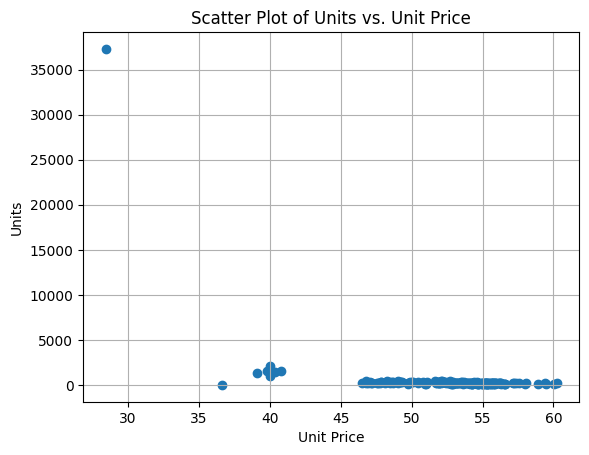

In [337]:
units = num2['units']
unit_price = num2['unit_price']

plt.scatter(unit_price, units)
plt.xlabel('Unit Price')
plt.ylabel('Units')
plt.title('Scatter Plot of Units vs. Unit Price')
plt.grid(True)

plt.show()

#### Outlier detection

In [338]:
# detect outliers using IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# detect outliers in 'unit_price' and 'units'
outliers_price = detect_outliers_iqr(num2['unit_price'])
outliers_units = detect_outliers_iqr(num2['units'])

# display rows with outliers
outlier_rows = num2[outliers_price | outliers_units]
print("Rows with Outliers:")
print(outlier_rows)

Rows with Outliers:
             Date        sku  unit_price    units
65   Nov 30, 2020  M630H8980       40.81   1551.0
66   Nov 29, 2020  M630H8980       39.77   1569.0
67   Nov 28, 2020  M630H8980       39.06   1380.0
68   Nov 27, 2020  M630H8980       40.00   2120.0
69   Nov 26, 2020  M630H8980       40.35   1394.0
70   Nov 25, 2020  M630H8980       39.99    960.0
150  Aug 27, 2020  M630H8980       36.65      5.0
151  Aug 26, 2020  M630H8980       28.42  37293.0
160  Aug 17, 2020  M630H8980       52.08    485.0


In [339]:
# drop outliers
num2_out =  num2.drop([65,66,67,68,69,70, 150, 151, 160])

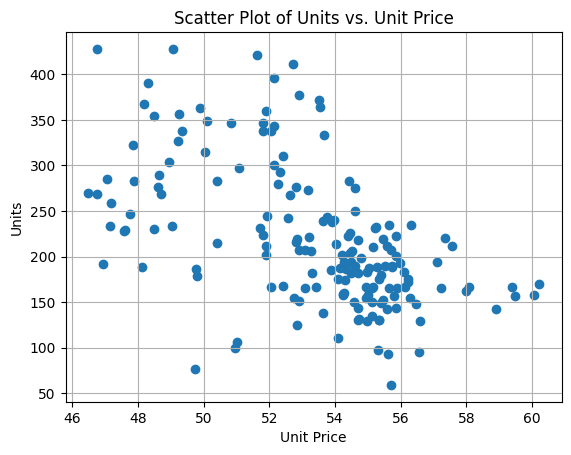

In [340]:
units = num2_out['units']
unit_price = num2_out['unit_price']

plt.scatter(unit_price, units)
plt.xlabel('Unit Price')
plt.ylabel('Units')
plt.title('Scatter Plot of Units vs. Unit Price')
plt.grid(True)

plt.show()

With the outliers removed we can obtain a better undestanding of the relation between price and units sold.

In [341]:
# descriptive statistics
# standard deviation: how much the members of a group differ
std_dev_x = np.std(num2_out['unit_price'])
std_dev_y = np.std(num2_out['units'])

print("Standard Deviation X:", std_dev_x)
print("Standard Deviation Y:", std_dev_y)

Standard Deviation X: 2.9645984286244733
Standard Deviation Y: 77.20727473233421


In [342]:
# correlation: expresses the extent to which two variables are linearly related
correlation_matrix = num2_out.corr()
correlation_matrix

<ipython-input-342-b79dfe9adba3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = num2_out.corr()


,unit_price,units
unit_price,1.000000,-0.542883
units,-0.542883,1.000000


We have a **moderate and negative** correlation.Watching the **graph** we can predict that if we drop the **price under 50** we will get a considerable increase in sales. But it's important for this exercice to understand that there is a moderate **correlation** between sells and units sold and thai if we drop the price, sales will increase. We could apply further analysis how elasticity of demand if needed.

### 2. Would lowering the price of No.2 impact the sales of product No.1? If so, how much?

In this case doesn't make sense to calculate this correlation beacause the variables are independent and not related. To establish causation we need more parameters (more dimensions) such as lower the price of number 2 during a season or in some locations.Without such controlled experiments, the variables are not relationable. **But wait a moment...**

We ha a **Date** field, maybe them have lowered the price depending of the date and we can calculate the correlation!!!

In [343]:
num1['Date'] = pd.to_datetime(num1['Date'])
num2['Date'] = pd.to_datetime(num1['Date'])
num1= num1.sort_values(by='Date')
num2= num2.sort_values(by='Date')

In [344]:
num1.tail(5)

,Date,sku,unit_price,units
4,2021-02-11,M735H7159,55.43,282.0
3,2021-02-12,M735H7159,55.20,242.0
2,2021-02-13,M735H7159,54.67,241.0
1,2021-02-14,M735H7159,55.60,320.0
0,2021-02-15,M735H7159,55.71,262.0


In [346]:
num2.tail(2)

,Date,sku,unit_price,units
176,NaT,M630H8980,49.21,327.0
177,NaT,M630H8980,49.90,363.0


There are some Dates that pandas couldn't handle. We will delete them.

In [347]:
num2 = num2.dropna()

In [348]:
num2.tail()

,Date,sku,unit_price,units
4,2021-02-11,M630H8980,49.81,179.0
3,2021-02-12,M630H8980,48.12,188.0
2,2021-02-13,M630H8980,47.15,233.0
1,2021-02-14,M630H8980,49.03,233.0
0,2021-02-15,M630H8980,49.77,186.0


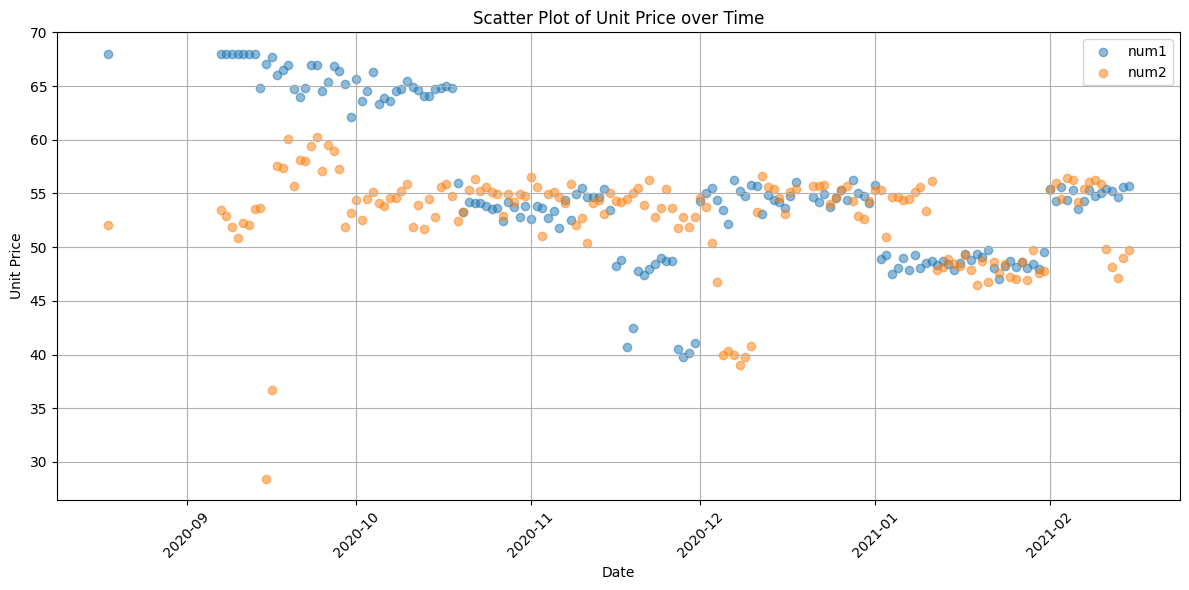

In [350]:
# Scatter plot for num1
plt.figure(figsize=(12, 6))
plt.scatter(num1['Date'], num1['unit_price'], label='num1', alpha=0.5)

# Scatter plot for num2
plt.scatter(num2['Date'], num2['unit_price'], label='num2', alpha=0.5)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.title('Scatter Plot of Unit Price over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

This graph is important because will allow to understand that **correlation not always imply causation**. If when num2 price drops num1 price drops the increase of sales of num1 comes from the drop of price of num1. But if we select only the 2020 data where the num1 price varies over time and num2 is stable we could respond the question **lowering the price of No.1 impact the sales of product No.2**, **but not the other way around as the exercise says.**

### 3. Should we also drop the price for product No.1? How would your decision impact the performance of the category?

In [ ]:
# define var
num1 = pricean_df[pricean_df['sku'] == 'M735H7159'].reset_index(drop=True)
num2 = pricean_df[pricean_df['sku'] == 'M630H8980'].reset_index(drop=True)
num1_2 = pricean_df[pricean_df['sku'].isin(['M735H7159', 'M630H8980'])].reset_index(drop=True)

This is an execise with 2 variables/dimensions and it's needed to understand the relation between them if we want to make **predictions**.

For this procedure it's important to know to know the **reliability and veracity** of the data and clean it if it's necessary.

### Data cleaning

*   Data Visualization

* Outlier detection

* Data imputation (we already know that there isn't null values).

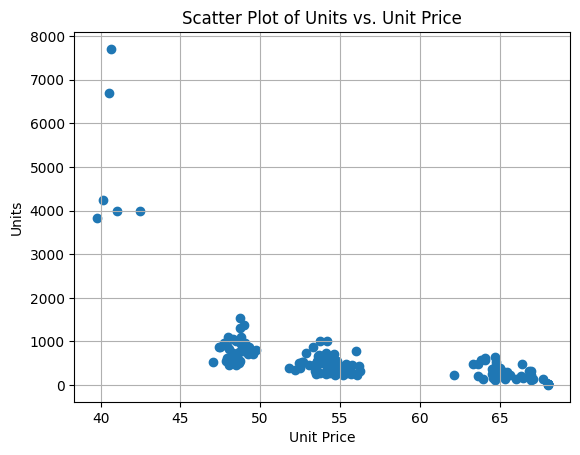

In [306]:
units = num1['units']
unit_price = num1['unit_price']

plt.scatter(unit_price, units)
plt.xlabel('Unit Price')
plt.ylabel('Units')
plt.title('Scatter Plot of Units vs. Unit Price')
plt.grid(True)

plt.show()

#### Outlier detection

In [307]:
# detect outliers using IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)


outliers_price = detect_outliers_iqr(num1['unit_price'])
outliers_units = detect_outliers_iqr(num1['units'])

# display rows with outliers
outlier_rows = num1[outliers_price | outliers_units]
outlier_rows

,Date,sku,unit_price,units
87,2020-11-18,M735H7159,40.68,7703.0
86,2020-11-19,M735H7159,42.47,3998.0
81,2020-11-24,M735H7159,49.01,1383.0
80,2020-11-25,M735H7159,48.75,1309.0
79,2020-11-26,M735H7159,48.75,1540.0
78,2020-11-27,M735H7159,40.55,6700.0
77,2020-11-28,M735H7159,39.77,3821.0
76,2020-11-29,M735H7159,40.12,4252.0
75,2020-11-30,M735H7159,41.04,3994.0


In [308]:
# drop outliers
num1_out =  num1.drop([75,76,77,78,79,80,81,86,86,87])

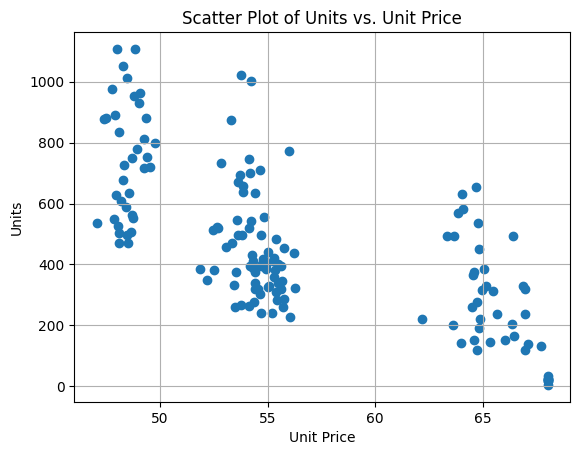

In [309]:
units = num1_out['units']
unit_price = num1_out['unit_price']

plt.scatter(unit_price, units)
plt.xlabel('Unit Price')
plt.ylabel('Units')
plt.title('Scatter Plot of Units vs. Unit Price')
plt.grid(True)

plt.show()

With the outliers removed we can obtain a better undestanding of the relation between price and units sold, and we can check in the graph that exist a negative correlation

In [310]:
# correlation: expresses the extent to which two variables are linearly related
correlation_matrix = num1_out.corr()
correlation_matrix

<ipython-input-310-cee5f39b164f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = num1_out.corr()


,unit_price,units
unit_price,1.000000,-0.692829
units,-0.692829,1.000000


For product **num1** we have a **stronger correlation than in num2**. The drop in the price of num1 would be reflected in the units sold. But if **we want to respond this exercise correctly about if the price should be droped we have to know the fixed and variable costs of production.**